In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Harris_With_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-6292639a29f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-6292639a29f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.101321,0.110347,0.071942,0.053114,0.047897,0.037839,0.042147,0.050807,0.047241,0.037713,...,9.324620e-02,4.238039e-01,6.715062e-01,8.073835e-01,0.597005,0.565447,0.647675,0.605962,0.527477,1
1,0.082086,0.063147,0.053802,0.049155,0.042264,0.045599,0.043198,0.039562,0.045843,0.054200,...,6.872211e-02,8.946283e-02,7.479922e-02,1.470863e-01,0.267091,0.285883,0.474876,0.666487,0.652925,1
2,1.088237,1.001196,0.871096,0.990780,0.939830,1.030811,0.943067,0.965316,0.891869,0.944755,...,9.250057e-01,8.351225e-01,8.863499e-01,1.029625e+00,1.027946,1.048981,0.901381,0.805016,0.945826,1
3,0.325038,0.304611,0.497250,0.616357,0.630908,0.831943,0.754949,0.721061,0.748124,0.778347,...,5.489108e-07,5.489108e-07,5.489108e-07,3.157715e-07,0.000164,0.000021,0.000010,0.000013,0.000014,1
4,0.199159,0.161790,0.172368,0.154511,0.198397,0.206563,0.201920,0.240476,0.282160,0.319041,...,4.163499e-01,3.076646e-01,2.320714e-01,2.482435e-01,0.242113,0.261411,0.285510,0.261292,0.275191,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7261904761904762
              precision    recall  f1-score   support

          -1       0.88      0.79      0.83       142
           1       0.25      0.38      0.30        26

    accuracy                           0.73       168
   macro avg       0.56      0.59      0.57       168
weighted avg       0.78      0.73      0.75       168



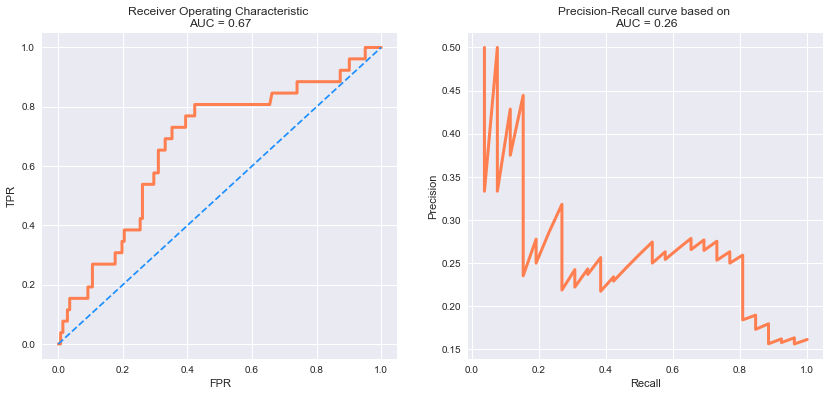

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()